In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv('Restaurant reviews.csv')
print(df.shape)
df.head(50)

(10000, 8)


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0,NaN
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5,1 Review,5/24/2019 1:02,0,NaN
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4,1 Review,5/23/2019 15:01,0,NaN
8,Beyond Flavours,Akash Thorat,"Excellent food , specially if you like spicy f...",5,"1 Review , 1 Follower",5/22/2019 23:12,0,NaN
9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend....,5,"1 Review , 1 Follower",5/22/2019 22:37,0,NaN


In [122]:
df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', '7514'],
      dtype='object')

In [123]:
# print the number of none
df.isnull().sum()

Restaurant       0
Reviewer        38
Review          45
Rating          38
Metadata        38
Time            38
Pictures         0
7514          9999
dtype: int64

I will remove the column 7514 and the lines with missing values because it's a small amount of data

In [124]:
# search the number of reviews and followers
def nb_review_follower(line):
    parts = line.split(", ")
    review = 0
    follower = 0

    for part in parts:
        if "Review" in part:
            review = int(part.split(" ")[0])
        elif "Follower" in part:
            follower = int(part.split(" ")[0])
    return review, follower

In [125]:
# add the columns nb_review and nb_follower
df["Metadata"] = df["Metadata"].astype(str)
df["nb_review"], df["nb_follower"] = zip(*df["Metadata"].apply(nb_review_follower))
df.head()


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514,nb_review,nb_follower
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN,3,2


In [126]:
print(df["Rating"].unique())

# convert the rating to float
def convert_to_float(x):
    try:
        return float(x)
    except (ValueError, TypeError):
        return np.nan

['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like' nan]


(9961, 10)


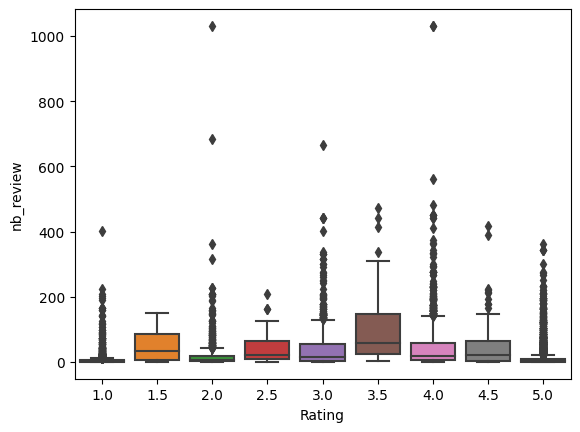

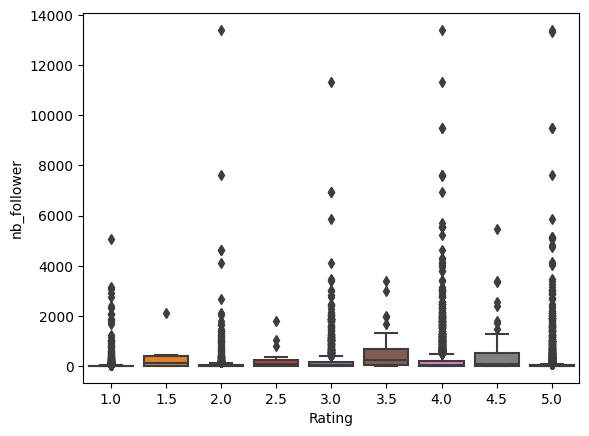

In [127]:
# drop the values that are not float
df["Rating"] = df["Rating"].apply(convert_to_float)
# drop the rows that have NaN value in the column Rating because it's just a little part of the dataset
df = df[pd.notna(df["Rating"])]
print(df.shape)
df["Rating"] = df["Rating"].astype(float)

# boxplot of the number of reviews for each rating
sns.boxplot(x="Rating", y="nb_review", data=df)
plt.show()

# boxplot of the number of followers for each rating
sns.boxplot(x="Rating", y="nb_follower", data=df)
plt.show()


For the number of reviews and the number of followers, I think it's important to take them into account because their boxplot shows that there are some relations between them and the rating. For example, we can see that for the extreme ratings (1.0 and 5.0) the number of reviews and the number of followers are near 0.

In [128]:
df["Time"] = pd.to_datetime(df["Time"])
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514,nb_review,nb_follower
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,2447.0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,NaN,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,NaN,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,NaN,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,NaN,3,2


C:\Users\Malo\AppData\Local\Temp\ipykernel_10816\3364285042.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_mn_rating_by_week = df.groupby(df["Time"].dt.week)["Rating"].mean()


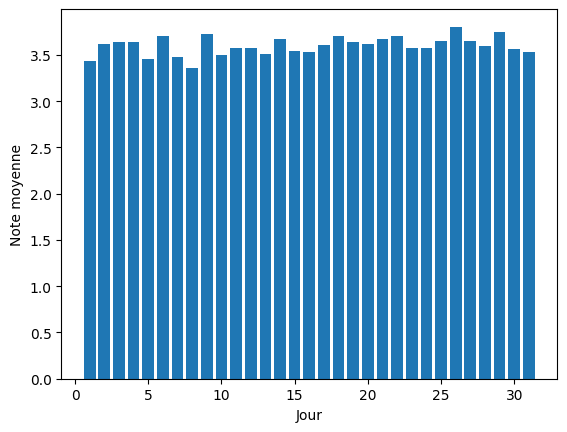

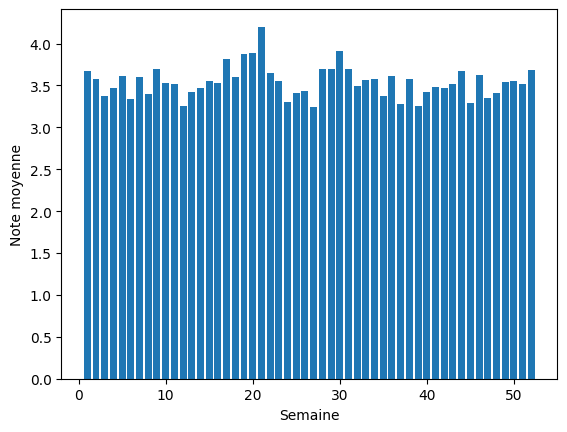

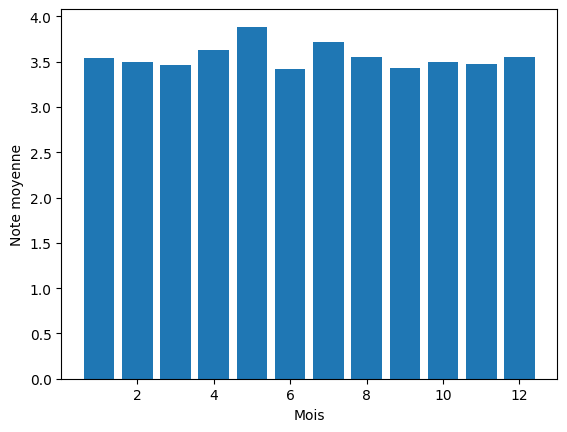

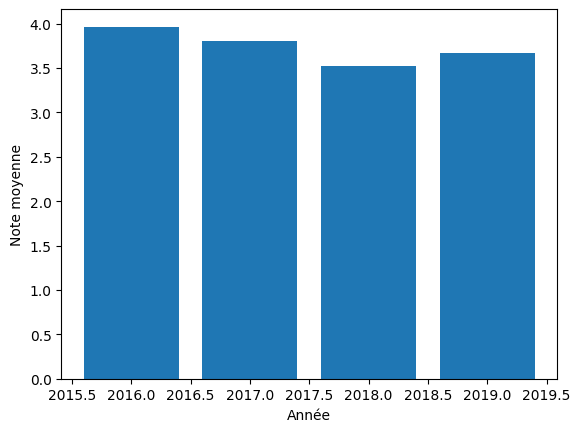

In [129]:
df_mn_rating_by_day = df.groupby(df["Time"].dt.day)["Rating"].mean()
df_mn_rating_by_week = df.groupby(df["Time"].dt.week)["Rating"].mean()
df_mn_rating_by_month = df.groupby(df["Time"].dt.month)["Rating"].mean()
df_mn_rating_by_year = df.groupby(df["Time"].dt.year)["Rating"].mean()

# barplot of the mean Rating by day, week, month and year
plt.bar(df_mn_rating_by_day.index, df_mn_rating_by_day)
plt.xlabel("Jour")
plt.ylabel("Note moyenne")
plt.show()

plt.bar(df_mn_rating_by_week.index, df_mn_rating_by_week)
plt.xlabel("Semaine")
plt.ylabel("Note moyenne")
plt.show()

plt.bar(df_mn_rating_by_month.index, df_mn_rating_by_month)
plt.xlabel("Mois")
plt.ylabel("Note moyenne")
plt.show()

plt.bar(df_mn_rating_by_year.index, df_mn_rating_by_year)
plt.xlabel("Année")
plt.ylabel("Note moyenne")
plt.show()

With these barplots, I think that it's important to take into account the date and more specifically the year because we can see a reduction in the rating over the years. It would be also interesting to take the months into account because we can see that the rating is higher for the months in summer.

In [130]:
# print the number of unique reviewers
print(df["Reviewer"].nunique())
# print the shape of the dataset
print(df.shape)

7446
(9961, 10)


We can see that we have 7446 unique reviewers for 9961 reviews. It means that some reviewers have written several reviews. It would be interesting to take into account the reviewer because it can have a significant impact on the rating. For example, if a reviewer has a tendency to give high ratings, it can be interesting to take it into account.

In [131]:
# check if there is html code in the reviews
print(df["Review"].str.contains("<.*?>", na=False, regex=True).value_counts())

df[df["Review"].str.contains("<.*?>", na=False, regex=True)].to_csv("html.csv", index=False)

False    9960
True        1
Name: Review, dtype: int64


After verification there isn't html code in the reviews.

In [132]:
# check if there is url in the reviews
print(df["Review"].str.contains("http", na=False).value_counts())

df[df["Review"].str.contains("http", na=False)].to_csv("http.csv", index=False)

False    9959
True        2
Name: Review, dtype: int64


After verification there are urls in the reviews.